# lgb010: feature importance

In [1]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
glob.glob("./models/lgb012_*")

['./models\\lgb012_0.pkl',
 './models\\lgb012_1.pkl',
 './models\\lgb012_10.pkl',
 './models\\lgb012_2.pkl',
 './models\\lgb012_3.pkl',
 './models\\lgb012_4.pkl',
 './models\\lgb012_5.pkl',
 './models\\lgb012_6.pkl',
 './models\\lgb012_7.pkl',
 './models\\lgb012_8.pkl',
 './models\\lgb012_9.pkl']

In [4]:
def get_feature_importance(model):
    return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))

In [6]:
features = pd.read_csv("./models/lgb012.csv")
model = load_model("./models/lgb012_0.pkl")

features["fi"] = get_feature_importance(model)

[info] load lgbmodel : ./models/lgb012_0.pkl


In [7]:
features.sort_values("fi").head(120)

,feature_name,fi
375,subsector_id_20_new_trans,0.000000
329,purchase_hour_4_new_trans,0.000000
328,purchase_hour_3_new_trans,0.000000
327,purchase_hour_2_new_trans,0.000000
68,city_id_231_hist_trans,0.000000
382,subsector_id_34_new_trans,0.000000
63,city_id_160_hist_trans,0.000000
319,merchant_category_id_842_new_trans,0.000000
75,city_id_322_hist_trans,0.000000
318,merchant_category_id_818_new_trans,0.000000


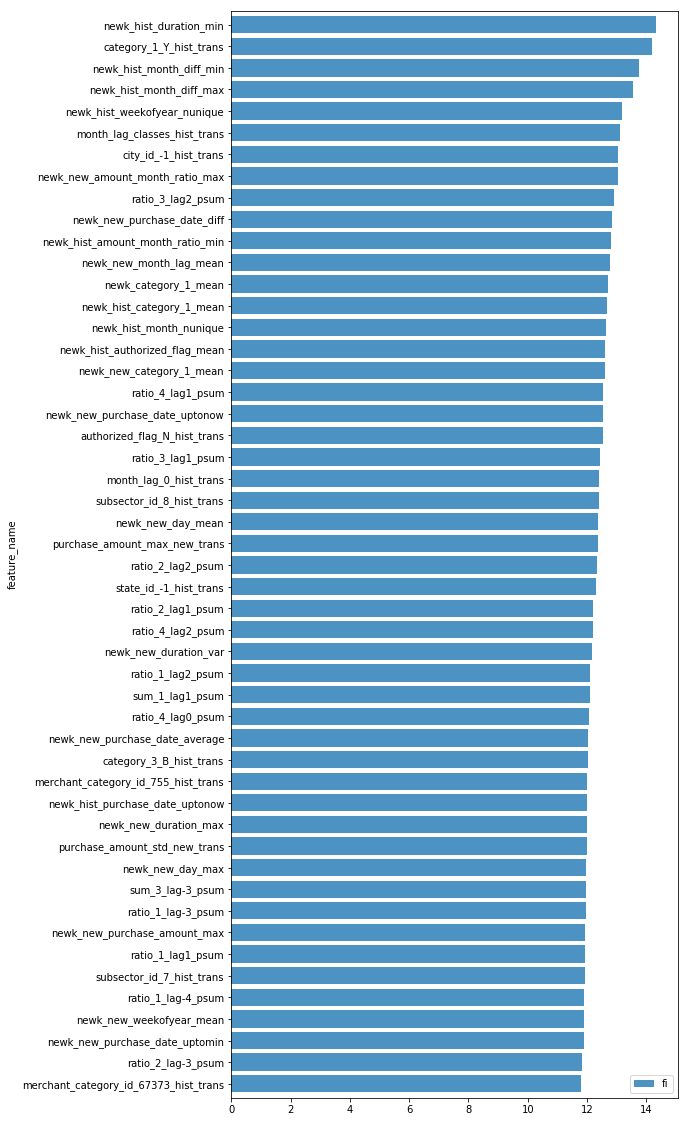

In [8]:
(features.set_index("feature_name")
         .sort_values("fi")
         .tail(50)
         .plot(kind="barh", figsize=(8, 20), alpha=.8, width=.8))

In [9]:
feature_importance_df = pd.DataFrame()
for i in range(11):
    part = pd.read_csv("./models/lgb012.csv")
    model = load_model("./models/lgb012_{}.pkl".format(i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load lgbmodel : ./models/lgb012_0.pkl
[info] load lgbmodel : ./models/lgb012_1.pkl
[info] load lgbmodel : ./models/lgb012_2.pkl
[info] load lgbmodel : ./models/lgb012_3.pkl
[info] load lgbmodel : ./models/lgb012_4.pkl
[info] load lgbmodel : ./models/lgb012_5.pkl
[info] load lgbmodel : ./models/lgb012_6.pkl
[info] load lgbmodel : ./models/lgb012_7.pkl
[info] load lgbmodel : ./models/lgb012_8.pkl
[info] load lgbmodel : ./models/lgb012_9.pkl
[info] load lgbmodel : ./models/lgb012_10.pkl


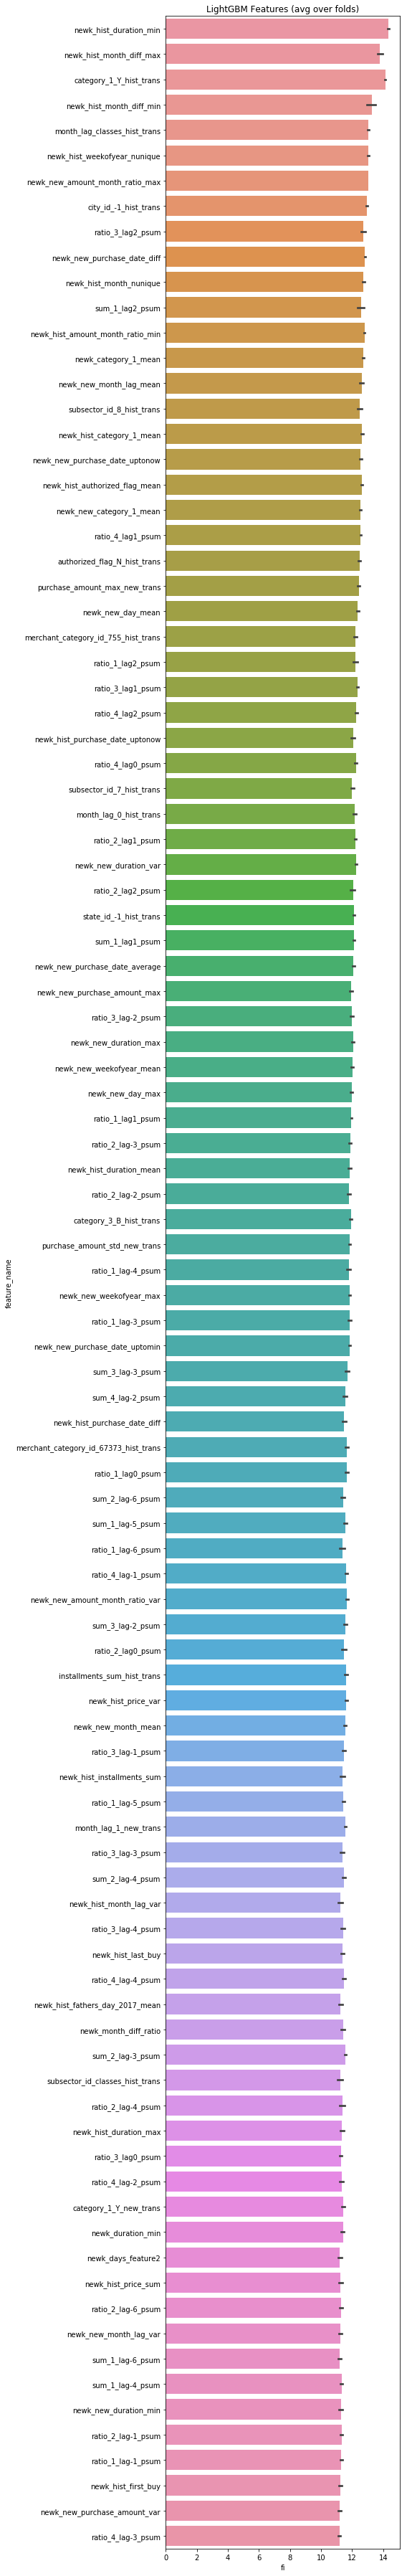

In [10]:
topk = feature_importance_df.groupby("feature_name").mean().sort_values(by="fi", ascending=False)[:100].index

toshow = feature_importance_df[feature_importance_df.feature_name.isin(topk)]

plt.figure(figsize=(8, 50))
sns.barplot(x="fi", y="feature_name", data=toshow.sort_values(by="fi", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [11]:
avg_importance = feature_importance_df.groupby("feature_name").mean().sort_values(by="fi", ascending=False)

In [12]:
avg_importance.describe()

,fi
count,676.000000
mean,8.661393
std,2.999582
min,0.000000
25%,7.392165
50%,9.565182
75%,10.769170
max,14.329986


In [13]:
list(avg_importance.tail(100).index)

['installments_7_hist_trans',
 'purchase_hour_10_new_trans',
 'state_id_18_hist_trans',
 'state_id_20_new_trans',
 'subsector_id_23_hist_trans',
 'merchant_category_id_703_hist_trans',
 'city_id_291_hist_trans',
 'category_2_2.0_new_trans',
 'state_id_15_new_trans',
 'state_id_12_new_trans',
 'city_id_137_hist_trans',
 'city_id_331_new_trans',
 'city_id_107_new_trans',
 'city_id_20_hist_trans',
 'purchase_hour_13_new_trans',
 'installments_classes_new_trans',
 'city_id_212_new_trans',
 'city_id_4_hist_trans',
 'city_id_322_hist_trans',
 'state_id_3_new_trans',
 'state_id_23_hist_trans',
 'state_id_8_hist_trans',
 'state_id_19_new_trans',
 'merchant_category_id_813_hist_trans',
 'merchant_category_id_40_hist_trans',
 'purchase_hour_20_new_trans',
 'subsector_id_24_hist_trans',
 'state_id_5_new_trans',
 'merchant_category_id_506_new_trans',
 'state_id_4_new_trans',
 'merchant_category_id_63_new_trans',
 'city_id_344_hist_trans',
 'merchant_category_id_367_new_trans',
 'installments_5_new

In [14]:
low_importance = [
    'city_id_213_new_trans',
    'subsector_id_25_new_trans',
    'state_id_11_new_trans',
    'purchase_month_201706_new_trans',
    'city_id_322_new_trans',
    'merchant_category_id_683_new_trans',
    'city_id_161_new_trans',
    'subsector_id_31_new_trans',
    'subsector_id_3_new_trans',
    'subsector_id_14_new_trans',
    'city_id_286_new_trans',
    'merchant_category_id_511_new_trans',
    'merchant_category_id_108_new_trans',
    'merchant_category_id_360_new_trans',
    'city_id_88_new_trans',
    'subsector_id_16_new_trans',
    'city_id_333_new_trans',
    'purchase_hour_22_new_trans',
    'city_id_233_new_trans',
    'merchant_category_id_437_new_trans',
    'city_id_25_hist_trans',
    'subsector_id_36_new_trans',
    'merchant_category_id_560_new_trans',
    'subsector_id_15_new_trans',
    'city_id_57_new_trans',
    'city_id_200_hist_trans',
    'city_id_231_new_trans',
    'state_id_1_new_trans',
    'state_id_7_new_trans',
    'merchant_category_id_607_new_trans',
    'city_id_20_new_trans',
    'state_id_22_new_trans',
    'subsector_id_2_new_trans',
    'city_id_291_new_trans',
    'merchant_category_id_834_new_trans',
    'subsector_id_10_new_trans',
    'subsector_id_13_hist_trans',
    'city_id_76_new_trans',
    'installments_4_new_trans',
    'merchant_category_id_87_new_trans',
    'merchant_category_id_557_new_trans',
    'merchant_category_id_111_new_trans',
    'subsector_id_12_new_trans',
    'state_id_10_new_trans',
    'state_id_13_new_trans',
    'city_id_143_new_trans',
    'subsector_id_38_new_trans',
    'city_id_244_new_trans',
    'purchase_hour_7_new_trans',
    'installments_999_hist_trans',
    'state_id_6_hist_trans',
    'installments_12_new_trans',
    'subsector_id_-1_new_trans',
    'subsector_id_9_new_trans',
    'installments_11_new_trans',
    'state_id_14_new_trans',
    'installments_7_new_trans',
    'state_id_17_new_trans',
    'city_id_4_new_trans',
    'city_id_51_new_trans',
    'state_id_8_new_trans',
    'installments_9_new_trans',
    'subsector_id_40_new_trans',
    'merchant_category_id_518_new_trans',
    'subsector_id_41_new_trans',
    'city_id_289_new_trans',
    'state_id_6_new_trans',
    'subsector_id_4_new_trans',
    'installments_999_new_trans',
    'authorized_flag_classes_new_trans',
    'subsector_id_5_new_trans',
    'city_id_160_new_trans',
    'city_id_283_new_trans',
    'subsector_id_11_hist_trans',
    'subsector_id_28_hist_trans',
    'purchase_month_201705_new_trans',
    'purchase_month_201704_new_trans',
    'purchase_month_201703_new_trans',
    'subsector_id_17_new_trans',
    'subsector_id_23_new_trans',
    'purchase_hour_6_new_trans',
    'subsector_id_24_new_trans',
    'merchant_category_id_273_new_trans',
    'city_id_140_new_trans',
    'subsector_id_26_new_trans',
    'city_id_117_new_trans',
    'subsector_id_28_new_trans',
    'subsector_id_11_new_trans',
    'city_id_246_hist_trans',
    'city_id_246_new_trans',
    'city_id_248_new_trans',
    'subsector_id_14_hist_trans',
    'subsector_id_13_new_trans',
    'city_id_25_new_trans',
    'merchant_category_id_813_new_trans',
    'merchant_category_id_19_new_trans',
    'merchant_category_id_195_new_trans',
    'merchant_category_id_130_new_trans',
    'merchant_category_id_606_new_trans',
    'state_id_23_new_trans'
]

duplicate = [
    'newk_feature_3',
    'newk_hist_month_lag_min',
    'newk_hist_month_lag_max',
    'newk_hist_merchant_id_nunique',
    'newk_hist_merchant_category_id_nunique',
    'purchase_month_classes_hist_trans',
    'newk_hist_subsector_id_nunique',
    'newk_hist_hour_nunique',
    'installments_0_hist_trans',
    'installments_1_hist_trans',
    'state_id_22_hist_trans',
    'subsector_id_15_hist_trans',
    'subsector_id_39_hist_trans',
    'subsector_id_30_hist_trans',
    'subsector_id_33_hist_trans',
    'newk_new_installments_max',
    'newk_new_month_lag_min',
    'newk_new_month_lag_max',
    'authorized_flag_Y_new_trans',
    'newk_new_merchant_id_nunique',
    'newk_new_card_id_count',
    'newk_new_merchant_category_id_nunique',
    'purchase_month_classes_new_trans',
    'newk_new_subsector_id_nunique',
    'newk_new_hour_nunique',
    'installments_0_new_trans',
    'installments_1_new_trans',
    'state_id_22_new_trans',
    'subsector_id_15_new_trans',
    'subsector_id_39_new_trans',
    'subsector_id_30_new_trans',
    'newk_feature_mean',
    'newk_hist_weekofyear_mean',
    'newk_purchase_amount_total',
    'newk_hist_month_diff_mean',
    'newk_month_diff_mean',
    'newk_card_id_total',
    'newk_card_id_cnt_total',
    'newk_month_diff_mean'
]

In [15]:
len(set(low_importance + duplicate))

136

In [17]:
from data_io import load_train_psum_features

In [18]:
train_features = load_train_psum_features(10000)

train - done in 0s
all_trans - done in 0s
hist_trans - done in 4s
new_trans - done in 3s
newk - done in 1s
psum - done in 1s


In [19]:
corr_mat = train_features.corr()

In [23]:
(corr_mat > 0.9).sum().sort_values()

subsector_id_-1_new_trans                  0
installments_999_new_trans                 0
authorized_flag_classes_new_trans          0
subsector_id_28_new_trans                  0
ratio_2_lag-12_psum                        0
sum_3_lag-12_psum                          0
ratio_3_lag-12_psum                        0
sum_4_lag-12_psum                          0
ratio_4_lag-12_psum                        0
sum_4_lag-11_psum                          0
ratio_4_lag-11_psum                        0
ratio_4_lag-10_psum                        0
ratio_3_lag-11_psum                        0
purchase_hour_3_new_trans                  1
purchase_hour_20_new_trans                 1
purchase_hour_19_new_trans                 1
purchase_hour_18_new_trans                 1
purchase_hour_17_new_trans                 1
purchase_hour_16_new_trans                 1
purchase_hour_15_new_trans                 1
purchase_hour_14_new_trans                 1
purchase_hour_13_new_trans                 1
purchase_h

In [24]:
avg_importance["dup_cnt"] = (corr_mat > 0.9).sum()

In [38]:
to_remove = []

for col in reversed(avg_importance[avg_importance.dup_cnt > 1].sort_values("fi").index):
    if col in to_remove:
        continue
    corr_col = corr_mat.loc[col]
    to_remove += [col_ for col_ in corr_col[corr_col > 0.9].index if col_ != col]

In [36]:
len(avg_importance[avg_importance.dup_cnt > 1])

244

In [39]:
avg_importance["to_remove"] = 0
avg_importance.loc[avg_importance.index.isin(to_remove), "to_remove"] = 1

In [42]:
avg_importance.sort_values("fi", inplace=True)

In [50]:
avg_importance[(avg_importance.fi > 5.5) & (avg_importance.to_remove == 0)].reset_index()[["feature_name"]].to_csv("./models/lgb013.csv", index=False)